In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

## scaling
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
## pipeline
from sklearn.pipeline import Pipeline, FeatureUnion



In [439]:
df = pd.read_excel('D:/train-regression/Data_Train.xlsx')

In [440]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [442]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [443]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [444]:
df['Month']=df['Date_of_Journey'].dt.month

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Month            10683 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 959.9+ KB


In [446]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [447]:
df['Additional_Info'].replace(to_replace='No Info',value='No info',inplace=True)

In [448]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [449]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3


In [450]:
# Format Dep_Time and Arrival_Time to include only hour and minute
df['Dep_Time'] = pd.to_datetime(df['Dep_Time']).dt.strftime('%H:%M')
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time']).dt.strftime('%H:%M')
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')  # Convert Dep_Time to datetime
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M')  # Convert Arrival_Time to datetime


C:\Users\ACTIVE\AppData\Local\Temp\ipykernel_8108\1965123564.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time']).dt.strftime('%H:%M')
C:\Users\ACTIVE\AppData\Local\Temp\ipykernel_8108\1965123564.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time']).dt.strftime('%H:%M')


In [451]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,2h 50m,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,19h,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,2h 30m,non-stop,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,3h,non-stop,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,2h 40m,non-stop,No info,12648,3


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Month            10683 non-null  int32         
dtypes: datetime64[ns](3), int32(1), int64(1), object(7)
memory usage: 959.9+ KB


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Month            10683 non-null  int32         
dtypes: datetime64[ns](3), int32(1), int64(1), object(7)
memory usage: 959.9+ KB


In [454]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,2h 50m,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,19h,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,2h 30m,non-stop,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,3h,non-stop,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,2h 40m,non-stop,No info,12648,3


In [455]:
df['Duration'] = df['Duration'].apply(pd.to_timedelta)

In [456]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,0 days 02:50:00,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,0 days 07:25:00,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,0 days 19:00:00,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,0 days 05:25:00,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,0 days 04:45:00,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,0 days 02:30:00,non-stop,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,0 days 02:35:00,non-stop,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,0 days 03:00:00,non-stop,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,0 days 02:40:00,non-stop,No info,12648,3


In [457]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,0 days 02:50:00,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,0 days 07:25:00,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,0 days 19:00:00,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,0 days 05:25:00,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,0 days 04:45:00,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,0 days 02:30:00,non-stop,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,0 days 02:35:00,non-stop,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,0 days 03:00:00,non-stop,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,0 days 02:40:00,non-stop,No info,12648,3


In [458]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,0 days 02:50:00,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,0 days 07:25:00,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,0 days 19:00:00,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,0 days 05:25:00,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,0 days 04:45:00,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,0 days 02:30:00,non-stop,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,0 days 02:35:00,non-stop,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,0 days 03:00:00,non-stop,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,0 days 02:40:00,non-stop,No info,12648,3


In [459]:
 df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [460]:
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop', '0 stop')

In [461]:
df['Total_Stops'] = df['Total_Stops'].fillna('0 stop')

In [462]:
 df['Total_Stops'].unique

<bound method Series.unique of 0         0 stop
1        2 stops
2        2 stops
3         1 stop
4         1 stop
          ...   
10678     0 stop
10679     0 stop
10680     0 stop
10681     0 stop
10682    2 stops
Name: Total_Stops, Length: 10683, dtype: object>

In [463]:

df['Total_Stops'] = df['Total_Stops'].str.replace(r'\D', '', regex=True).astype(int)

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          10683 non-null  object         
 1   Date_of_Journey  10683 non-null  datetime64[ns] 
 2   Source           10683 non-null  object         
 3   Destination      10683 non-null  object         
 4   Route            10682 non-null  object         
 5   Dep_Time         10683 non-null  datetime64[ns] 
 6   Arrival_Time     10683 non-null  datetime64[ns] 
 7   Duration         10683 non-null  timedelta64[ns]
 8   Total_Stops      10683 non-null  int32          
 9   Additional_Info  10683 non-null  object         
 10  Price            10683 non-null  int64          
 11  Month            10683 non-null  int32          
dtypes: datetime64[ns](3), int32(2), int64(1), object(5), timedelta64[ns](1)
memory usage: 918.2+ KB


In [465]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,0 days 02:50:00,0,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,0 days 07:25:00,2,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,0 days 19:00:00,2,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,0 days 05:25:00,1,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,0 days 04:45:00,1,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,0 days 02:30:00,0,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,0 days 02:35:00,0,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,0 days 03:00:00,0,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,0 days 02:40:00,0,No info,12648,3


In [466]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
9039,Air India,2019-05-06,Delhi,Cochin,NaN,1900-01-01 09:45:00,1900-01-01 09:25:00,0 days 23:40:00,0,No info,7480,5


In [467]:
df.dropna(subset=['Route'], inplace=True)


In [468]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month


In [469]:
df['stops'] = df['Route'].str.count('→') - 1


In [470]:
(df['Total_Stops']-df['stops'] ).unique()

array([0], dtype=int64)

In [471]:
df.drop(columns='stops',inplace=True)

In [472]:
df.isna().sum().sort_values(ascending=False)/df.shape[0]

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
Month              0.0
dtype: float64

<Axes: >

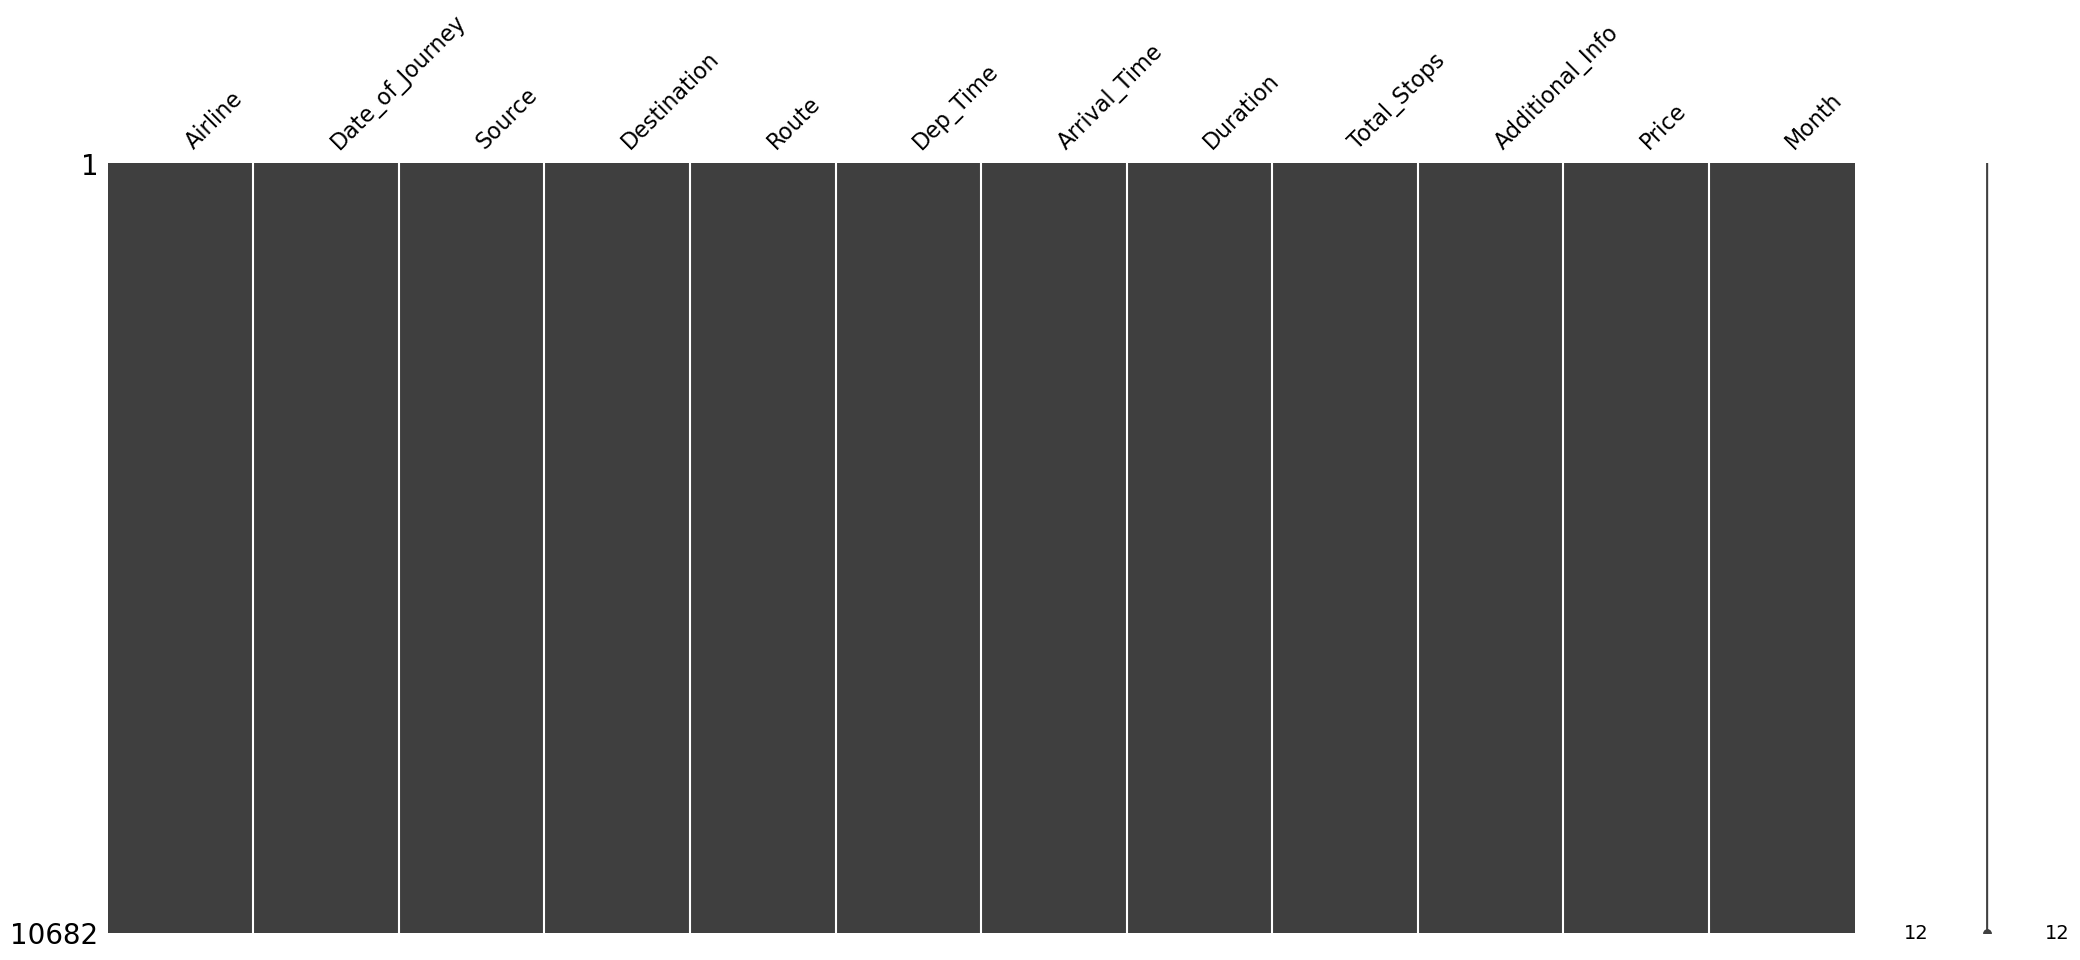

In [473]:
missingno.matrix(df)

In [474]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [475]:
df['Month'].unique()

array([3, 5, 6, 4])

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          10682 non-null  object         
 1   Date_of_Journey  10682 non-null  datetime64[ns] 
 2   Source           10682 non-null  object         
 3   Destination      10682 non-null  object         
 4   Route            10682 non-null  object         
 5   Dep_Time         10682 non-null  datetime64[ns] 
 6   Arrival_Time     10682 non-null  datetime64[ns] 
 7   Duration         10682 non-null  timedelta64[ns]
 8   Total_Stops      10682 non-null  int32          
 9   Additional_Info  10682 non-null  object         
 10  Price            10682 non-null  int64          
 11  Month            10682 non-null  int32          
dtypes: datetime64[ns](3), int32(2), int64(1), object(5), timedelta64[ns](1)
memory usage: 1001.4+ KB


In [477]:
def classify_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Dep_Time'].dt.hour.apply(classify_time_of_day)

In [478]:
df.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time'],inplace=True)

In [479]:
df.duplicated().sum()

4693

In [480]:
df[df.duplicated()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Time_of_Day
30,Vistara,Chennai,Kolkata,0 days 02:15:00,0,No info,3687,6,Morning
65,IndiGo,Delhi,Cochin,0 days 10:25:00,1,No info,5894,6,Morning
142,IndiGo,Delhi,Cochin,0 days 05:25:00,1,No info,5636,6,Midnight
153,Jet Airways,Kolkata,Banglore,0 days 12:20:00,1,No info,14781,5,Morning
156,Jet Airways,Delhi,Cochin,0 days 16:35:00,2,No info,14300,6,Evening
...,...,...,...,...,...,...,...,...,...
10676,Multiple carriers,Delhi,Cochin,0 days 08:40:00,1,No info,9794,5,Morning
10677,SpiceJet,Banglore,Delhi,0 days 02:40:00,0,No check-in baggage included,3257,5,Midnight
10678,Air Asia,Kolkata,Banglore,0 days 02:30:00,0,No info,4107,4,Evening
10679,Air India,Kolkata,Banglore,0 days 02:35:00,0,No info,4145,4,Evening


In [481]:
df.drop_duplicates(inplace=True)

In [482]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Time_of_Day
0,IndiGo,Banglore,New Delhi,0 days 02:50:00,0,No info,3897,3,Night
1,Air India,Kolkata,Banglore,0 days 07:25:00,2,No info,7662,5,Midnight
2,Jet Airways,Delhi,Cochin,0 days 19:00:00,2,No info,13882,6,Morning
3,IndiGo,Kolkata,Banglore,0 days 05:25:00,1,No info,6218,5,Evening
4,IndiGo,Banglore,New Delhi,0 days 04:45:00,1,No info,13302,3,Afternoon
...,...,...,...,...,...,...,...,...,...
10667,Jet Airways,Banglore,New Delhi,0 days 21:25:00,1,In-flight meal not included,11087,3,Night
10670,Air India,Kolkata,Banglore,0 days 17:25:00,2,No info,11411,5,Midnight
10674,Jet Airways,Banglore,New Delhi,1 days 00:45:00,1,In-flight meal not included,11087,3,Evening
10681,Vistara,Banglore,New Delhi,0 days 02:40:00,0,No info,12648,3,Morning


## Univariate

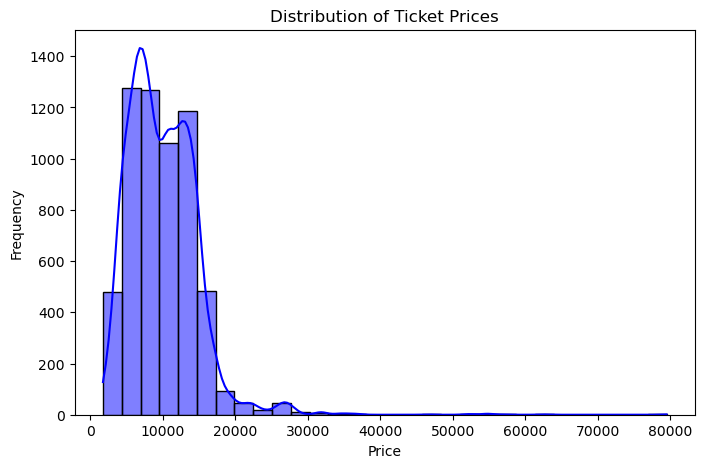

In [483]:
# 1. Histogram for Price
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

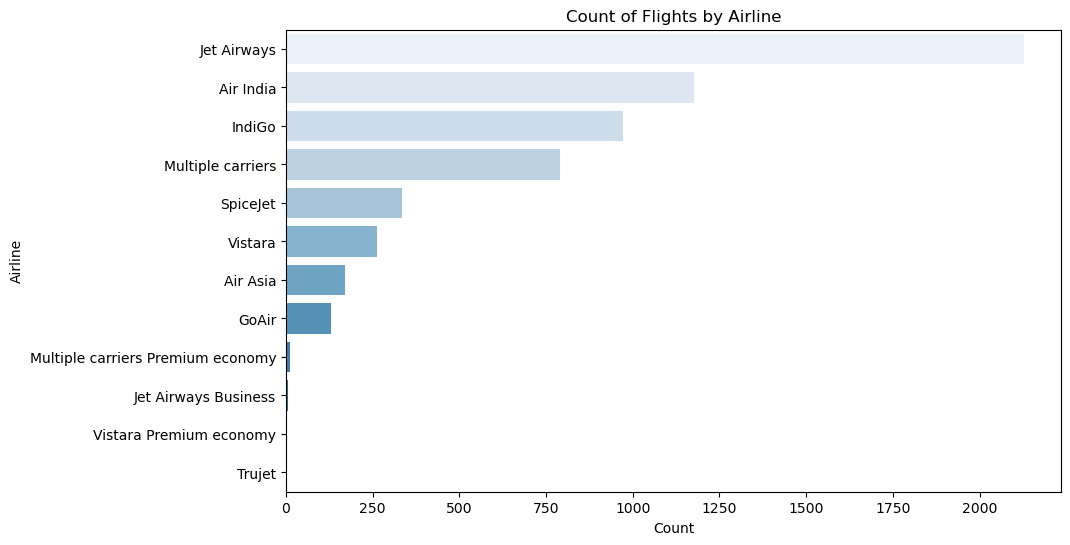

In [484]:
# 2. Bar chart for Airlines
plt.figure(figsize=(10, 6))
sns.countplot(y='Airline', data=df, order=df['Airline'].value_counts().index, palette='Blues')
plt.title('Count of Flights by Airline')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

In [485]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(1,2)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    plt.tight_layout()

C:\Users\ACTIVE\AppData\Local\Temp\ipykernel_8108\1936147846.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


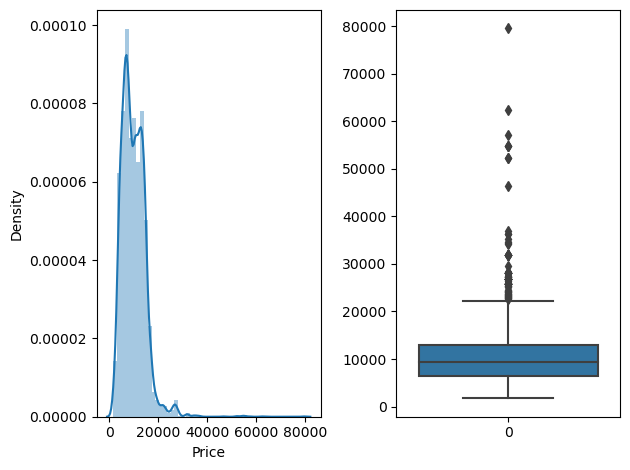

In [486]:
plot(df,'Price')

In [487]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

C:\Users\ACTIVE\AppData\Local\Temp\ipykernel_8108\1936147846.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


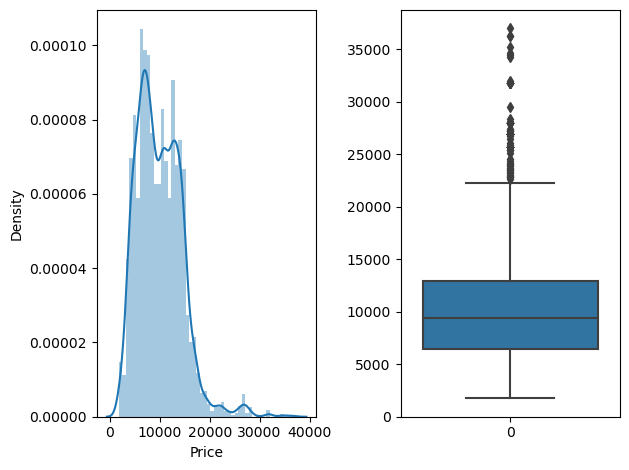

In [488]:
plot(df,'Price')

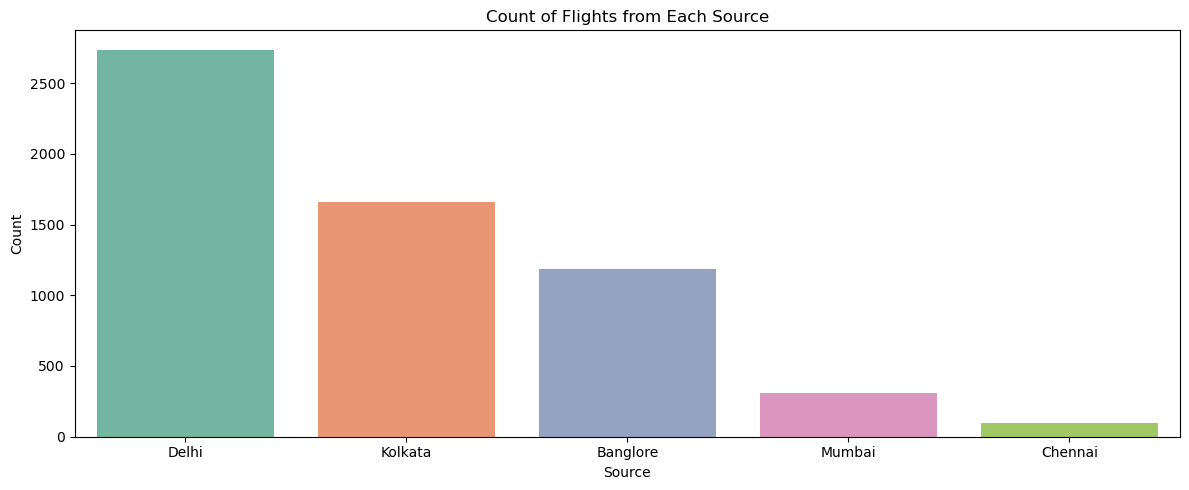

In [489]:
# 2. Bar Chart for Source and Destination
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Source', palette='Set2', order=df['Source'].value_counts().index)
plt.title('Count of Flights from Each Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

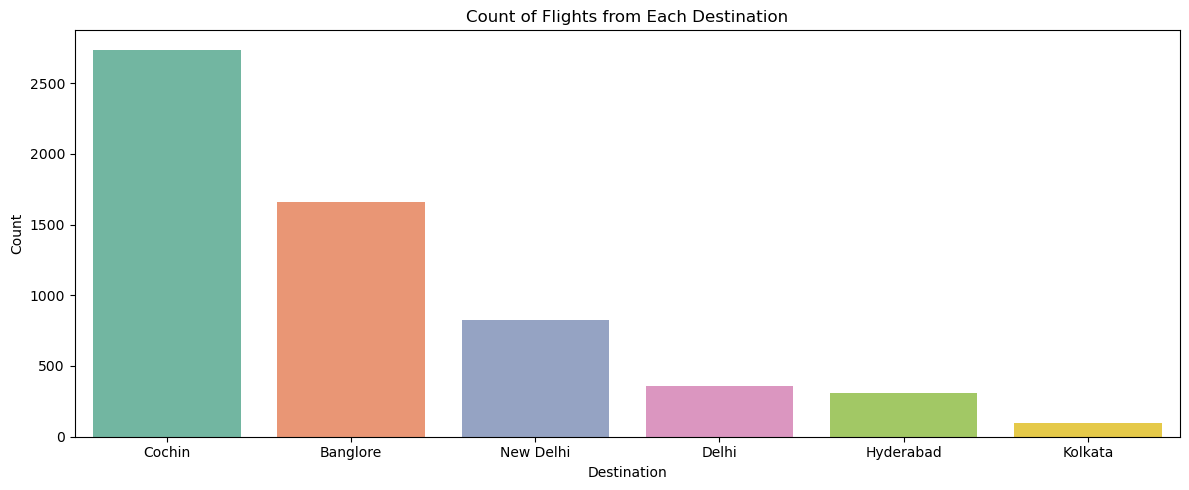

In [490]:
# 2. Bar Chart for Source and Destination
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Destination', palette='Set2', order=df['Destination'].value_counts().index)
plt.title('Count of Flights from Each Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

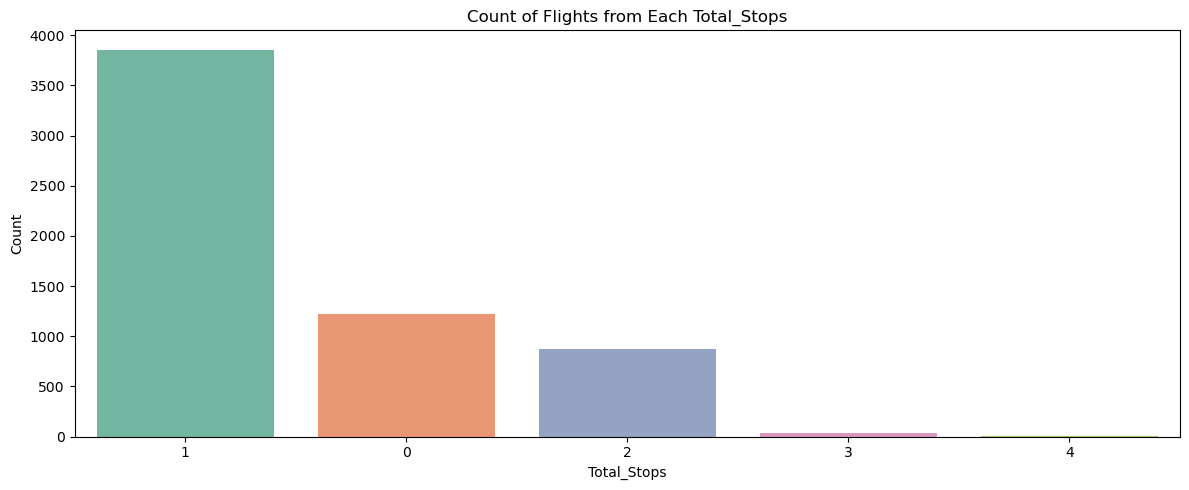

In [491]:
# 2. Bar Chart for Source and Destination
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Total_Stops', palette='Set2', order=df['Total_Stops'].value_counts().index)
plt.title('Count of Flights from Each Total_Stops')
plt.xlabel('Total_Stops')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Bivariate

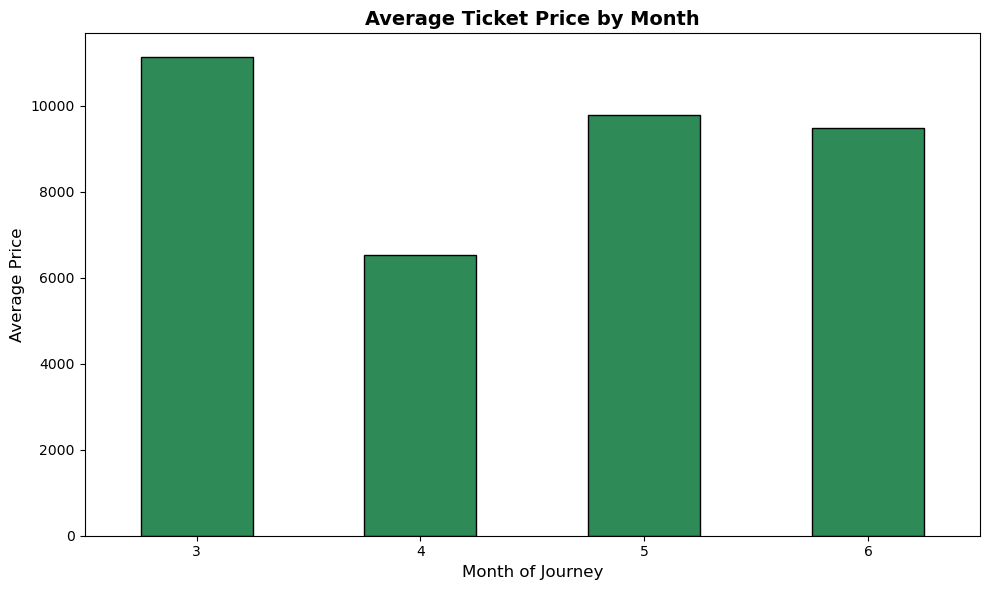

In [492]:
# Bivariate Analysis: Bar Chart for Month vs Average Price
plt.figure(figsize=(10, 6))
average_price_by_month = df.groupby('Month')['Price'].mean()  # Calculate average price per month
average_price_by_month.plot(kind='bar', color='seagreen', edgecolor='black')  # Create a bar chart

plt.title('Average Ticket Price by Month', fontsize=14, fontweight='bold')  # Enhanced title styling
plt.xlabel('Month of Journey', fontsize=12)  # Label for x-axis
plt.ylabel('Average Price', fontsize=12)  # Label for y-axis
plt.xticks(rotation=0, fontsize=10)  # Keep x-axis labels horizontal
plt.tight_layout()  # Ensure proper spacing
plt.show()


## Multivariate

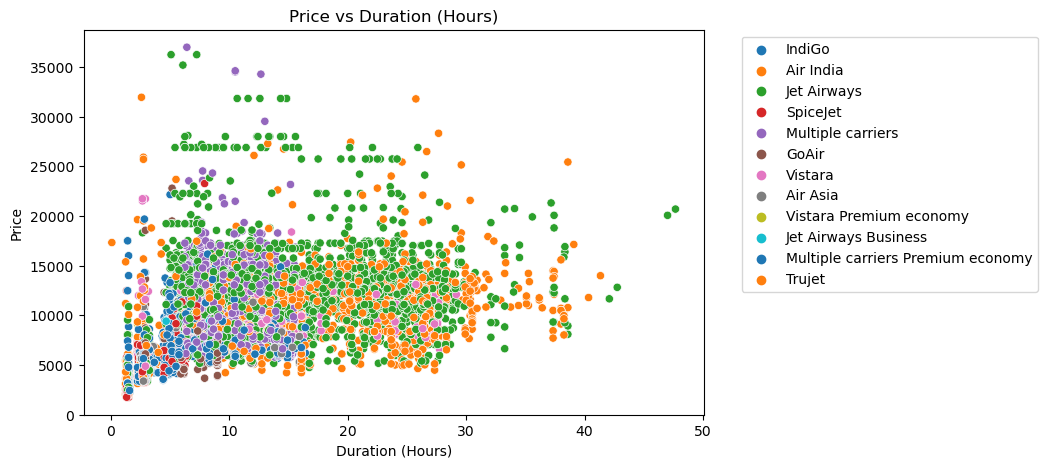

In [493]:
# 3. Scatter plot for Price vs Duration
durationHours =  df['Duration'].dt.total_seconds() / 3600
plt.figure(figsize=(8, 5))
sns.scatterplot(x=durationHours, y='Price', data=df, hue='Airline', palette='tab10')
plt.title('Price vs Duration (Hours)')
plt.xlabel('Duration (Hours)')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


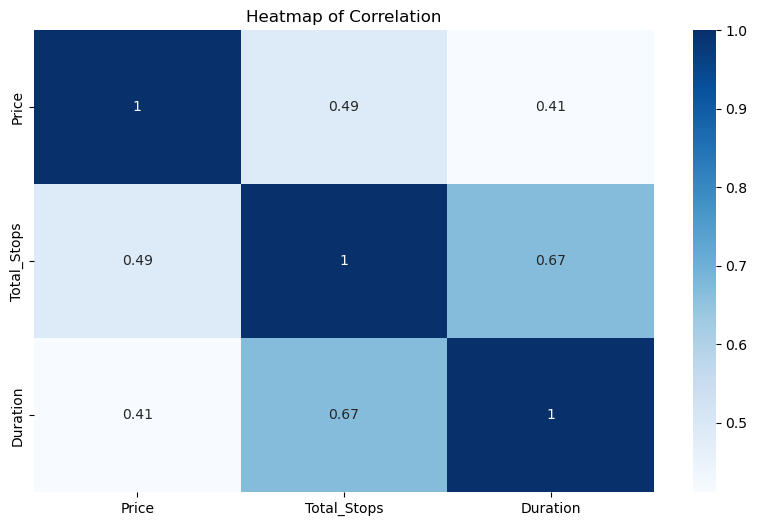

In [494]:
# Multivariate Analysis
# 5. Heatmap of Correlation between Numerical Features
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Price', 'Total_Stops', 'Duration']].corr(), annot=True, cmap='Blues')
plt.title('Heatmap of Correlation')
plt.show()

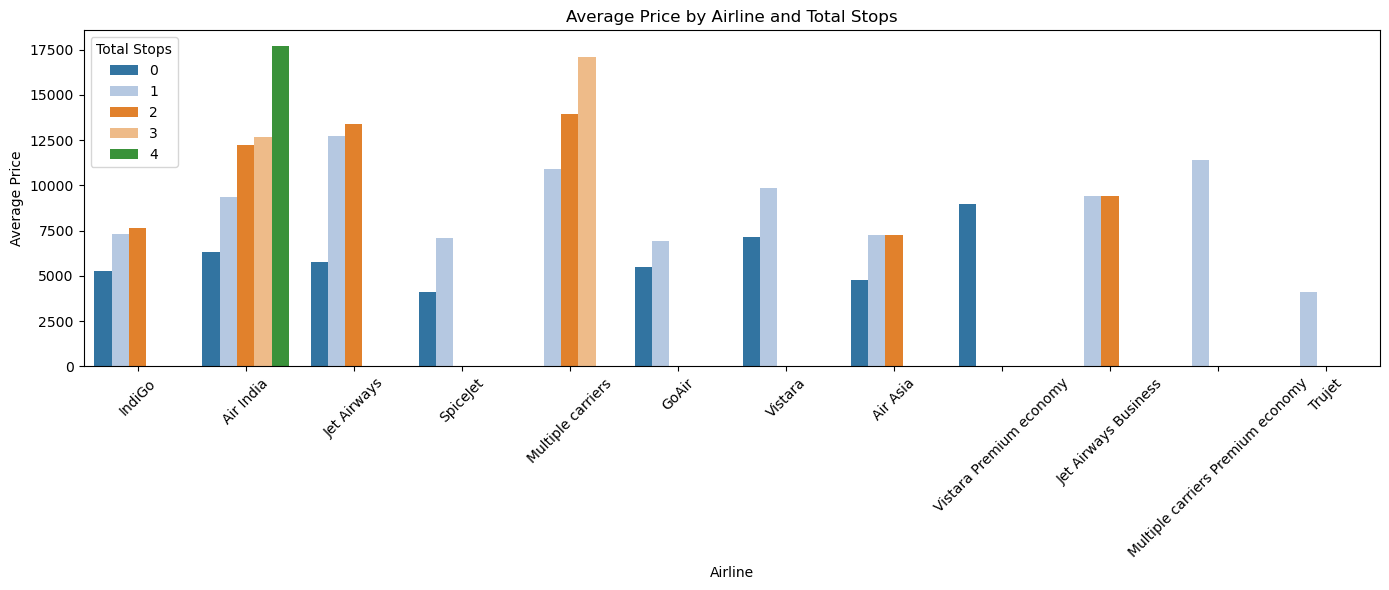

In [495]:
# 6. Grouped Bar Chart for Airline vs Price by Total Stops
plt.figure(figsize=(14, 6))
sns.barplot(x='Airline', y='Price', hue='Total_Stops', data=df, errorbar=None, palette='tab20')
plt.title('Average Price by Airline and Total Stops')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Total Stops')
plt.tight_layout()
plt.show()

## pre-processing

In [496]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

In [497]:
numCols = x.select_dtypes(include="number")
catCols = x.select_dtypes(include="object")
numCols.info(), catCols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5989 entries, 0 to 10682
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Duration     5989 non-null   timedelta64[ns]
 1   Total_Stops  5989 non-null   int32          
 2   Month        5989 non-null   int32          
dtypes: int32(2), timedelta64[ns](1)
memory usage: 269.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 5989 entries, 0 to 10682
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          5989 non-null   object
 1   Source           5989 non-null   object
 2   Destination      5989 non-null   object
 3   Additional_Info  5989 non-null   object
 4   Time_of_Day      5989 non-null   object
dtypes: object(5)
memory usage: 409.8+ KB


(None, None)